In [1]:
from datetime import datetime

In [2]:
datetime.now().strftime("%Y%m%d %I:%m:%S %p")

'20201020 07:10:08 PM'

In [3]:
import tensorflow as tf

In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import qutip as qt 

In [72]:
from CD_control_optimization.batch_optimizer import BatchOptimizer


Need tf version 2.3.0 or later. Using tensorflow version: 2.3.1



In [73]:
import matplotlib.pyplot as plt

In [74]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6918126074080382834, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15809038684748770951
 physical_device_desc: "device: XLA_CPU device"]

In [77]:
from bosonic_codes.GKPCode import SquareGKPCode

In [78]:
N = 60
c = SquareGKPCode(N = N)

In [86]:
N_blocks = 4
alpha = 2 + 1j
N_multistart = 10
epochs = 10
use_displacements = True
no_CD_end = True
initial_states = [qt.tensor(qt.basis(2,0),qt.basis(N,0))]
#target_states = [qt.tensor(qt.basis(2,0), c.zero_logical)]
#target_states = [qt.tensor(qt.basis(2,0),qt.basis(N,1))]
target_states = [qt.tensor(qt.basis(2,0), (qt.coherent(N,alpha) + qt.coherent(N,-alpha)).unit())]
desired_epsilon = 1e-3
term_fid = 1-desired_epsilon
dfid_stop = 1e-5
name='Cat Creation'
metadata = {'alpha':alpha}

In [87]:
opt = BatchOptimizer(initial_states=initial_states, target_states=target_states, N_blocks=N_blocks,term_fid = term_fid,
N_multistart=N_multistart, use_displacements=use_displacements, no_CD_end=no_CD_end, dfid_stop=dfid_stop, name=name, epochs=epochs,
metadata = metadata)

In [88]:
opt.parameters

{'optimization_type': 'state transfer',
 'N_multistart': 10,
 'N_blocks': 4,
 'term_fid': 0.999,
 'dfid_stop': 1e-05,
 'no_CD_end': True,
 'name': 'Cat Creation',
 'learning_rate': 0.01,
 'epoch_size': 10,
 'epochs': 10,
 'use_displacements': True,
 'comment': '',
 'alpha': (2+1j),
 'N_cav': 60}

In [89]:
all_fids = opt.optimize()

Start time: 2020-10-20 08:02:29 PM
 Epoch: 0 / 10 Max Fid: 0.022867 Avg Fid: 0.008352 Max dFid: 0.000000 Avg dFid: 0.000000 Elapsed time: 0:00:00.309723WARNING:tensorflow:5 out of the last 598 calls to <function BatchOptimizer.optimize.<locals>.entry_stop_gradients at 0x00000195FF0B5948> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
 Epoch: 10 / 10 Max Fid: 0.499971 Avg Fid: 0.498676 Max dFid: 0.001721 Avg dFid: 0.00

In [70]:
opt.print_best_info()


Need tf version 2.3.0 or later. Using tensorflow version: 2.3.1


Optimization parameters: 
optimization_type: state transfer
N_multistart: 10
N_blocks: 4
term_fid: 0.999
dfid_stop: 1e-05
no_CD_end: True
name: Cat Creation
learning_rate: 0.01
epoch_size: 10
epochs: 10
use_displacements: True
comment: 
N_cav: 60
saving directory: 
filename: Cat Creation.h5

Best circuit parameters found:
betas:         [-2.3705 -0.82489j -1.63824-1.18661j  0.1635 -0.29324j  0.     +0.j     ]
alphas:        [ 0.9456 -0.61099j  0.35818+0.37509j -0.77558+0.21835j -0.52462+0.01124j]
phis (deg):    [  0.      159.53859 131.70499 110.07512]
thetas (deg):  [  89.92124 -174.89082   89.83569  -89.59476]
Max Fidelity:  0.972284




In [78]:
opt.opt_data['20201020 03:10:44 PM']['fidelities']

[<tf.Tensor: shape=(100, 1, 1), dtype=float32, numpy=
 array([[[5.8836932e-03]],
 
        [[9.4290838e-02]],
 
        [[4.3546066e-02]],
 
        [[1.3265099e-02]],
 
        [[8.3900474e-02]],
 
        [[1.4242643e-01]],
 
        [[2.0674685e-02]],
 
        [[9.0045266e-02]],
 
        [[1.6751019e-03]],
 
        [[2.4187290e-03]],
 
        [[3.6996879e-02]],
 
        [[9.3862750e-03]],
 
        [[4.4461102e-03]],
 
        [[2.5417243e-05]],
 
        [[2.6613055e-02]],
 
        [[3.2409298e-04]],
 
        [[4.3939436e-03]],
 
        [[4.7209281e-03]],
 
        [[6.9723304e-05]],
 
        [[9.1377813e-03]],
 
        [[4.7208210e-03]],
 
        [[1.7076149e-03]],
 
        [[1.0538159e-02]],
 
        [[2.8038265e-03]],
 
        [[2.6737805e-04]],
 
        [[6.2415428e-02]],
 
        [[3.3794772e-03]],
 
        [[6.5368288e-03]],
 
        [[1.1117589e-02]],
 
        [[1.4315638e-01]],
 
        [[3.8549211e-02]],
 
        [[2.4890550e-03]],
 
        [[3.547471

Text(0.5, 1.0, '100x batch optimization')

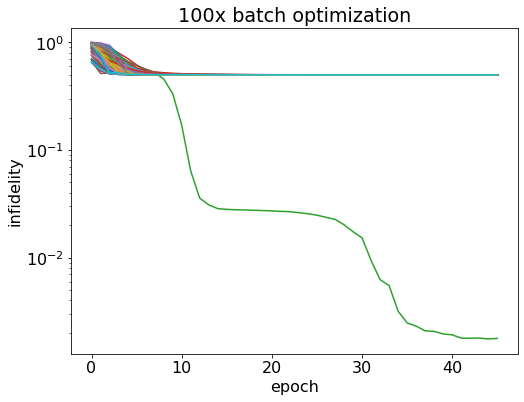

In [61]:
plt.figure(figsize=(8,6))
if len(all_fids.shape)>1:
    for fids in all_fids:
        plt.semilogy(1-fids)
else:
    plt.semilogy(1-all_fids)
plt.xlabel('epoch')
plt.ylabel('infidelity')
plt.title("100x batch optimization")

In [12]:
opt.print_info()

N_blocks:      13
N_cav:         150
Term fid:      0.999000
displacements: True
betas:         [-1.97029-0.28883j  0.952  +1.83084j  0.60509+1.20158j  1.41588-0.10037j
 -0.13527+2.21448j  0.35805-1.17894j  0.17192-1.39535j  0.51442-2.23291j
  0.16784+0.08297j  0.42073+1.36565j -2.07611+0.06131j -0.0156 +0.275j
  0.     +0.j     ]
alphas:        [-1.02509-0.11505j  0.3734 -0.67415j -0.00837+0.22248j  0.38074+0.36864j
  0.37071-0.64483j -0.25447-0.25752j -0.02434+0.42733j  0.52192+0.09537j
 -0.49827-0.13123j  0.37139+0.84754j -0.89245-0.07978j  0.43886+0.20953j
  0.90172-0.26097j]
phis (deg):    [   0.       -90.36703  136.87666   85.96552 -238.21811 -174.8386
 -219.77438  -58.84529  149.94058  202.25029   53.54964  -46.55733
  -67.68881]
thetas (deg):  [ 77.61581 -93.30581 -31.36774  84.76545  64.63038 122.06938 -49.266
 167.31834  65.57642 -31.05608 -34.12381  90.1578   90.57544]
Max Fidelity:  0.973786




In [138]:
betas, alphas, phis, thetas = opt.get_numpy_vars()

In [96]:
betas.T.shape

(100, 4)

In [135]:
fids = opt.batch_state_fidelities(opt.betas_rho, opt.betas_angle, opt.alphas_rho, opt.alphas_angle, opt.phis, opt.thetas)

In [136]:
max_idx = tf.argmax(fids)[0,0].numpy()
max_idx

3

In [137]:
fids[max_idx]

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.9990886]], dtype=float32)>

In [139]:
betas[max_idx]

array([-0.5561494 +0.48497143j, -0.90719783+0.4212181j ,
        0.25257835-0.5857842j ,  0.53398037-0.3803535j ,
       -0.53930205+0.07885566j,  0.10578421-0.29431564j,
        0.5301093 -0.6532741j , -1.0107905 +0.16428041j,
       -0.34737718-0.6934846j , -0.703758  +0.7224283j ], dtype=complex64)

In [25]:
with tf.device("XLA_GPU:0"):
    a = tf.constant(1.0)

[autoreload of unitary_decomposition_optimizer.batch_global_test failed: Traceback (most recent call last):
  File "C:\ProgramData\Miniconda3\envs\tf_env\lib\site-packages\IPython\extensions\autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "D:\alec\Projects\CD_universal_control\Simulations\CD_control\unitary_decomposition_optimizer\batch_global_test.py", line 61
    with tf.device("XLA_GPU:0):
                              ^
SyntaxError: EOL while scanning string literal
]


ValueError: Unknown attribute: 'XLA_GPU' in 'XLA_GPU:0'

In [26]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2632440045583715788, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3455532801952576930
 physical_device_desc: "device: XLA_CPU device"]

In [27]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [36]:
chi_ab = 2*np.pi*1e-9*10

In [37]:
chi_ab

6.283185307179586e-08

In [38]:
nbar = 1/(4*chi_ab*1000)
nbar

3978.873577297384

In [39]:
np.sqrt(nbar)

63.07831305050401

In [29]:
np.sqrt(400.0)

20.0

In [90]:
import h5py

In [104]:
data = np.array([1.0,2.0,3.0])
with h5py.File('test.h5', "w") as f:
    fidelities = f.create_dataset("fidelities", data = data, maxshape=(None,))

In [106]:
with h5py.File('test.h5', "a") as f:
    f['fidelities'].resize(4, axis=0)
    f['fidelities'][-1] = 4.0

In [162]:
fs_MHz = np.linspace(0,0.2,201)
omegas_MRadps = 2*np.pi*fs_MHz
tau_us = 10
argument = omegas_MRadps*tau_us/2/np.pi
y = np.sinc(argument)**2


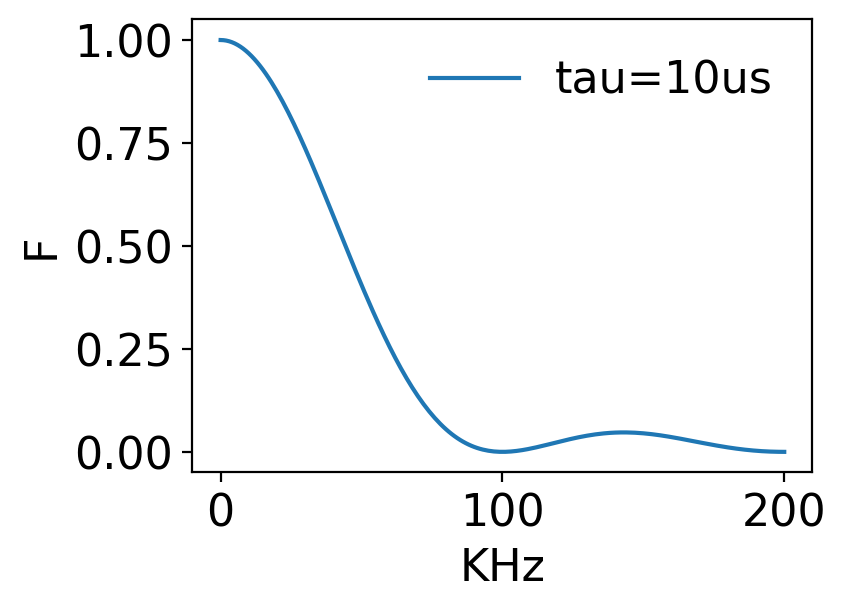

In [166]:
plt.figure(figsize=(4,3),dpi=200)
plt.plot(fs_MHz*1e3, y, label='tau=10us')
plt.xlabel('KHz')
plt.ylabel('F')
plt.legend(frameon=False)